Loading data...
Pad sequences...
Training model...
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - accuracy: 0.6501 - loss: 0.5885 - val_accuracy: 0.8554 - val_loss: 0.3422
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8698 - loss: 0.3263 - val_accuracy: 0.8734 - val_loss: 0.3098
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8953 - loss: 0.2654 - val_accuracy: 0.8594 - val_loss: 0.3290
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.9099 - loss: 0.2308 - val_accuracy: 0.8818 - val_loss: 0.2839
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9253 - loss: 0.1959 - val_accuracy: 0.8638 - val_loss: 0.3368
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9376 - loss: 0.1671 - val_accuracy: 0.8912 - val_loss: 0.2804
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9491 - loss: 0.1500 - val_accuracy: 0.9002 - val_loss: 0.2847
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━

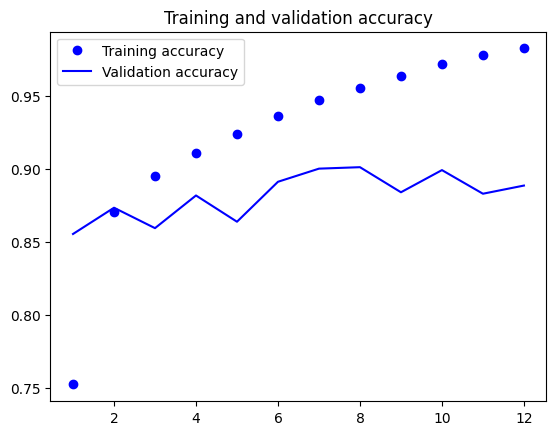

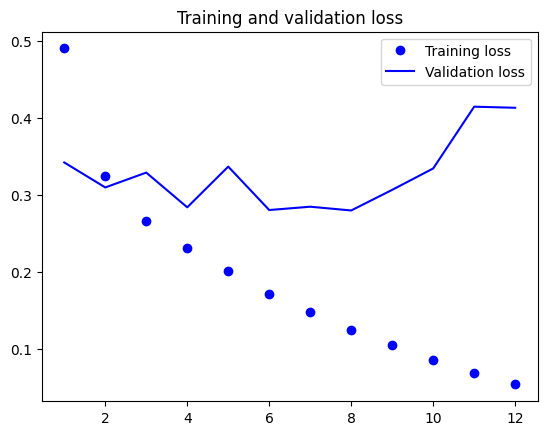

In [2]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess data
max_features = 10000
maxlen = 500

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

print('Pad sequences...')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Create RNN model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
print('Training model...')
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predictions
predictions = model.predict(X_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Print some predictions and actual values
for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, Actual: {y_test[i]}")

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')  # Plot training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  # Plot validation accuracy
plt.title('Training and validation accuracy')  # Title of the plot
plt.legend()  # Show legend

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')  # Plot training loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Plot validation loss
plt.title('Training and validation loss')  # Title of the plot
plt.legend()  # Show legend

plt.show()  # Display plots